<a href="https://colab.research.google.com/github/aditi0502/Basic_of_python/blob/main/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np


In [ ]:
path=('/content/archive (1).zip')
df=pd.read_csv(path)
df.head()

,index,company,body-style,wheel-base,length,engine-type,num-of-cylinders,horsepower,average-mileage,price
0,0,alfa-romero,convertible,88.6,168.8,dohc,four,111,21,13495.0
1,1,alfa-romero,convertible,88.6,168.8,dohc,four,111,21,16500.0
2,2,alfa-romero,hatchback,94.5,171.2,ohcv,six,154,19,16500.0
3,3,audi,sedan,99.8,176.6,ohc,four,102,24,13950.0
4,4,audi,sedan,99.4,176.6,ohc,five,115,18,17450.0


List of data types

In [ ]:
print(df.dtypes)

index                 int64
company              object
body-style           object
wheel-base          float64
length              float64
engine-type          object
num-of-cylinders     object
horsepower            int64
average-mileage       int64
price               float64
dtype: object


What is data type of Monthly income?

In [ ]:
df['price'].dtype

dtype('float64')

In [ ]:
df.corr()

,index,wheel-base,length,horsepower,average-mileage,price
index,1.000000,0.013401,0.004828,-0.093809,0.176037,-0.197470
wheel-base,0.013401,1.000000,0.878381,0.463421,-0.547325,0.663085
length,0.004828,0.878381,1.000000,0.668555,-0.788429,0.788465
horsepower,-0.093809,0.463421,0.668555,1.000000,-0.808804,0.901707
average-mileage,0.176037,-0.547325,-0.788429,-0.808804,1.000000,-0.770217
price,-0.197470,0.663085,0.788465,0.901707,-0.770217,1.000000


Find the correlation between age joblevel monthly income

In [ ]:
df[['wheel-base','length','price']].corr()

,wheel-base,length,price
wheel-base,1.000000,0.878381,0.663085
length,0.878381,1.000000,0.788465
price,0.663085,0.788465,1.000000


positive linear relationship

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

(0.0, 57600.4653098101)

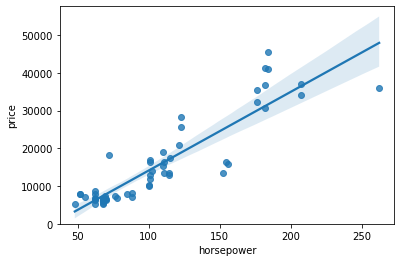

In [ ]:
sns.regplot(x='horsepower',y='price',data=df)
plt.ylim(0)

In [ ]:
df[['horsepower','price']].corr()

,horsepower,price
horsepower,1.000000,0.901707
price,0.901707,1.000000


Negative linear relationship

(0.0, 48494.02950380404)

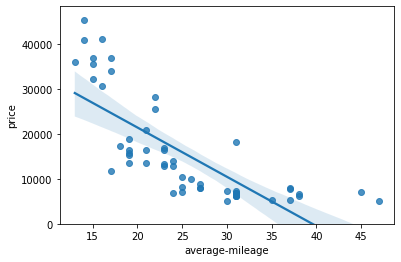

In [ ]:
sns.regplot(x='average-mileage',y='price',data=df)
plt.ylim(0)

In [ ]:
df[['average-mileage','price']].corr()

,average-mileage,price
average-mileage,1.000000,-0.770217
price,-0.770217,1.000000


Weak linear relationship

categorical variables

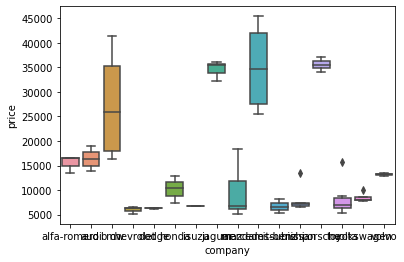

In [ ]:
sns.boxplot(x='company',y='price',data=df)

Descriptive statistical analysis

In [ ]:
df.describe()

,index,wheel-base,length,horsepower,average-mileage,price
count,61.000000,61.000000,61.000000,61.000000,61.000000,58.000000
mean,40.885246,98.481967,173.098361,107.852459,25.803279,15387.000000
std,25.429706,6.679234,14.021846,53.524398,8.129821,11320.259841
min,0.000000,88.400000,141.100000,48.000000,13.000000,5151.000000
25%,18.000000,94.500000,159.100000,68.000000,19.000000,6808.500000
50%,39.000000,96.300000,171.200000,100.000000,25.000000,11095.000000
75%,61.000000,101.200000,177.300000,123.000000,31.000000,18120.500000
max,88.000000,120.900000,208.100000,288.000000,47.000000,45400.000000


to include object values

In [ ]:
df.describe(include=['object'])

,company,body-style,engine-type,num-of-cylinders
count,61,61,61,61
unique,16,5,7,7
top,toyota,sedan,ohc,four
freq,7,32,46,39


value_counts

In [ ]:
df['num-of-cylinders'].value_counts()

four      39
six       11
five       5
eight      3
three      1
twelve     1
two        1
Name: num-of-cylinders, dtype: int64

We can convert the series to a Dataframe as follows :

In [ ]:
df['num-of-cylinders'].value_counts().to_frame()

,num-of-cylinders
four,39
six,11
five,5
eight,3
three,1
twelve,1
two,1


Rename

In [ ]:
num_of_cylinders_counts=df['num-of-cylinders'].value_counts().to_frame()
num_of_cylinders_counts.rename(columns={'num_of_cylinders_counts':'value_counts'},inplace=True)
num_of_cylinders_counts

,num-of-cylinders
four,39
six,11
five,5
eight,3
three,1
twelve,1
two,1


In [ ]:
num_of_cylinders_counts.index.name='no.of cylinders'
num_of_cylinders_counts

,num-of-cylinders
no.of cylinders,
four,39
six,11
five,5
eight,3
three,1
twelve,1
two,1


In [ ]:
engine_type_counts=df['engine-type'].value_counts()
engine_type_counts.rename(columns={'engine-type': 'value_counts'}, inplace=True)
engine_type_counts.index.name='engine_type'

TypeError: ignored

Basic of grouping

In [ ]:
df['num-of-cylinders'].unique()

array(['four', 'six', 'five', 'three', 'twelve', 'two', 'eight'],
      dtype=object)

In [ ]:
df_group_one=df[['num-of-cylinders','company','price']]
df_group_one

,num-of-cylinders,company,price
0,four,alfa-romero,13495.0
1,four,alfa-romero,16500.0
2,six,alfa-romero,16500.0
3,four,audi,13950.0
4,five,audi,17450.0
...,...,...,...
56,four,volkswagen,7975.0
57,four,volkswagen,7995.0
58,four,volkswagen,9995.0
59,four,volvo,12940.0


In [ ]:
df_gptest=df[['num-of-cylinders','engine-type','price']]
grouped_test1=df_gptest.groupby(['num-of-cylinders','engine-type'],as_index=False).mean()

In [ ]:
grouped_pivot=grouped_test1.pivot(index='num-of-cylinders',columns='price')
grouped_pivot

engine-type                                         \
price                    NaN 5151.000000  8661.285714  11845.000000   
num-of-cylinders                                                      
eight                  dohcv          NaN          NaN          NaN   
five                     NaN          NaN          NaN          NaN   
four                     NaN          NaN          ohc          NaN   
six                      NaN          NaN          NaN          NaN   
three                    NaN            l          NaN          NaN   
twelve                   NaN          NaN          NaN          NaN   
two                      NaN          NaN          NaN        rotor   

                                                                      \
price            14997.500000 14999.500000 21084.000000 27850.000000   
num-of-cylinders                                                       
eight                     NaN          NaN          NaN          NaN   
five                      NaN          NaN          ohc          NaN   
four                     dohc          NaN          NaN          NaN   
six                       NaN         ohcv          NaN         dohc   
three                     NaN          NaN          NaN          NaN   
twelve                    NaN          NaN          NaN          NaN   
two                       NaN          NaN          NaN          NaN   

                                                                      
price            32481.250000 35528.000000 36000.000000 43180.000000  
num-of-cylinders                                                      
eight                     NaN          NaN          NaN         ohcv  
five                      NaN          NaN          NaN          NaN  
four                      NaN          NaN          NaN          NaN  
six                       ohc         ohcf          NaN          NaN  
three                     NaN          NaN          NaN          NaN  
twelve                    NaN          NaN         ohcv          NaN  
two                       NaN          NaN          NaN          NaN

correlation and causation

In [ ]:
from scipy import stats

Wheel base vs price

In [ ]:
pearson_coef,p_value=stats.pearsonr(df['wheel-base'],df['price'])
print("The pearson correlation coef is",pearson_coef,"With a p-value of p",p_value)

ValueError: ignored